# Tasks for laboratory assignment 3

In [1]:
import sys

# Встановлюємо пакети прямо в папку поточного python.exe
!{sys.executable} -m pip install --upgrade pandas matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Додаємо для гарних графіків

# Моделі
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split # Обов'язково для валідації
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler # Для масштабування даних (важливо для класифікації)

# Налаштування стилю графіків
sns.set(style="whitegrid")
%matplotlib inline

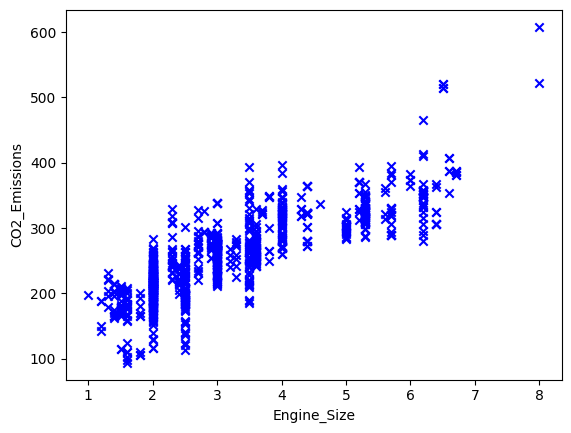

In [7]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [ ]:
def extract_texts_from_file(file_path):
    """
    Extract the text data from the csv file

    Args:
        file_path (str): Relative location of the csv file in the project.

    Returns:
        list: The list of texts as strings.
    """
    return None 

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

In [ ]:
def CO2_emissions(data):
    """
    Build a model that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

    Args:
        data: CO2 emissions data.

    Returns:
        list: The list of model theta parameters.
    """
    return None 

data = extract_texts_from_file('resources/CO2_emission.csv')
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

In [ ]:
def ice_cream_selling(data):
    """
    Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

    Args:
        data: ice cream sales data.

    Returns:
        list: The list of model theta parameters.
    """
    return None 

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

In [ ]:
def power_consumption(data):
    """
    Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. 
    Visualize model on a plot.

    Args:
        data: power consumption data.

    Returns:
        list: The list of model theta parameters.
    """
    return None 

data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

Точність (Accuracy): 0.85

Звіт класифікації:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



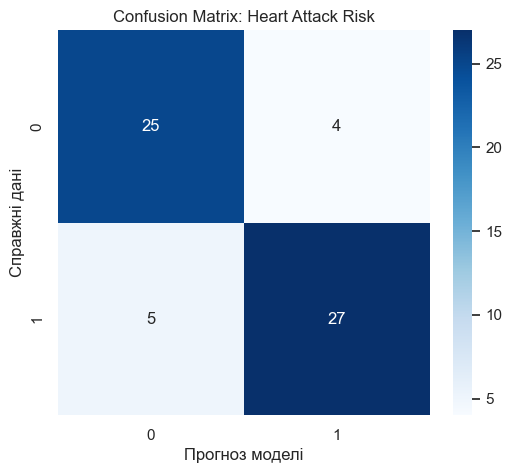

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def heart_classification():
    # 1. Завантаження
    df = pd.read_csv('resources/heart.csv')
    
    # Розділяємо дані
    X = df.drop('output', axis=1) # Всі колонки крім output
    y = df['output']              # Тільки output
    
    # 2. Спліт
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 3. Масштабування (ОБОВ'ЯЗКОВО для класифікації)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 4. Навчання (Логістична регресія)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # 5. Прогноз
    y_pred = model.predict(X_test_scaled)
    
    # 6. Оцінка
    print(f"Точність (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
    print("\nЗвіт класифікації:")
    print(classification_report(y_test, y_pred))
    
    # 7. Матриця плутанини
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix: Heart Attack Risk')
    plt.ylabel('Справжні дані')
    plt.xlabel('Прогноз моделі')
    plt.show()
    return None 

heart_classification()

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.